In [ ]:
# Find the accuracy, mse, mae using decision tree, KNN & Logistic regression  algorithm. 
# Create a dataframe & make a barplot using these values.

In [97]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [34]:
ps= pd.read_excel('shoe.xlsx')

In [35]:
ps.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [36]:
ps.rename(columns={"size(cm)":"size", "class(y)":"gender"}, inplace=True)

In [37]:
ps.head()

,size,gender
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [38]:
ps.dtypes

size      float64
gender     object
dtype: object

In [39]:
ps.gender.unique()

array(['Female', 'Male'], dtype=object)

# Encoding

In [40]:
ps.gender = ps.gender.replace(['Female', 'Male'],[0,1])

In [41]:
ps.head()

,size,gender
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [65]:
ps.isnull().sum()

size      0
gender    0
dtype: int64

In [43]:
ps.isnull().any()

size      False
gender    False
dtype: bool

# Visualization

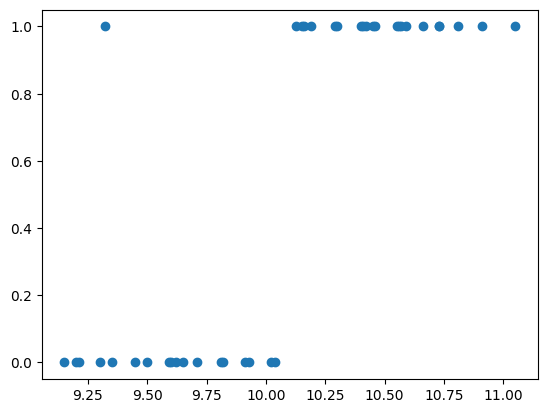

In [44]:
plt.scatter(ps['size'],ps['gender'])

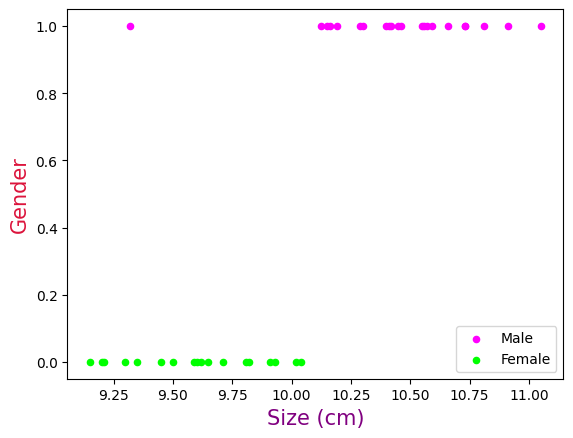

In [55]:
ps_male = ps[ps['gender'] == 1]
ps_female = ps[ps['gender'] == 0]

plt.scatter(ps_male['size'],ps_male['gender'], s=20, color="magenta", label="Male")
plt.scatter(ps_female['size'],ps_female['gender'], s=20,  color="lime", label="Female")
plt.xlabel("Size (cm)",color="purple",size="15")
plt.ylabel("Gender",color="crimson",size="15")
plt.legend(loc="lower right")

# Train Test Split

In [62]:
ps.head()

,size,gender
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [56]:
p = ps[['size']]
s = ps[['gender']]

In [61]:
ptrain, ptest, strain, stest = tts(p, s, test_size=0.3, random_state=38)

In [63]:
ptrain.head()

,size
30,10.04
14,10.55
32,10.40
26,10.29
38,9.60


In [64]:
strain.head()

,gender
30,0
14,1
32,1
26,1
38,0


# Logistic Regression

In [69]:
lr = LogisticRegression()

In [70]:
lr.fit(ptrain,strain)

LogisticRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org

In [75]:
lr_pred = lr.predict(ptest)

Accuracy / Score (By LR)

In [76]:
lr_score = lr.score(ptest,stest)
lr_score

0.9166666666666666

MAE (By LR)

In [80]:
lr_mae = mean_absolute_error(stest, lr_pred)
lr_mae

0.08333333333333333

MSE (By LR) 

In [82]:
lr_mse = mean_squared_error(stest, lr_pred)
lr_mse

0.08333333333333333

# Decision Tree

In [83]:
dtc = DecisionTreeClassifier()

In [84]:
dtc.fit(ptrain,strain)

DecisionTreeClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. 
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org

In [85]:
dtc_pred = dtc.predict(ptest)

Accuracy / Score (By DTC)

In [86]:
dtc_score = dtc.score(ptest,stest)
dtc_score

0.6666666666666666

MAE (By DTC)

In [87]:
dtc_mae = mean_absolute_error(stest, dtc_pred)
dtc_mae

0.3333333333333333

MSE (By DTC)

In [88]:
dtc_mse = mean_squared_error(stest, dtc_pred)
dtc_mse

0.3333333333333333

# K-nearest neighbors (KNN)

In [89]:
knnc = KNeighborsClassifier()

In [90]:
knnc.fit(ptrain,strain)

KNeighborsClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. 
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org

In [91]:
knnc_pred = knnc.predict(ptest)

Accuracy / Score (By KNNC)

In [92]:
knnc_score = knnc.score(ptest,stest)
knnc_score

1.0

MAE (By KNNC)

In [93]:
knnc_mae = mean_absolute_error(stest, knnc_pred)
knnc_mae

0.0

MSE (By KNNC)

In [94]:
knnc_mse = mean_squared_error(stest, knnc_pred)
knnc_mse

0.0

# Dataframe & Barplot

In [103]:
data = {
   'Name':['LR_accuracy','LR_mae','LR_mse',
           'DTC_accuracy','DTC_mae','DTC_mse',
           'KNNC_accuracy','KNNC_mae','KNNC_mse',],
   'Accuracy':[lr_score,lr_mae,lr_mse, dtc_score,dtc_mae,dtc_mse, knnc_score,knnc_mae,knnc_mse]}
df_after_pred = pd.DataFrame(data=data)

In [104]:
df_after_pred

,Name,Accuracy
0,LR_accuracy,0.916667
1,LR_mae,0.083333
2,LR_mse,0.083333
3,DTC_accuracy,0.666667
4,DTC_mae,0.333333
5,DTC_mse,0.333333
6,KNNC_accuracy,1.000000
7,KNNC_mae,0.000000
8,KNNC_mse,0.000000


<Axes: xlabel='Accuracy', ylabel='Name'>

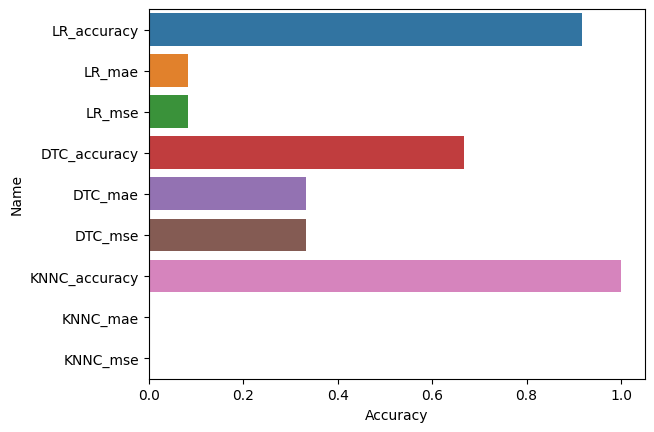

In [105]:
sb.barplot(x='Accuracy', y='Name', data=df_after_pred)